In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c

def check_guess(f, x_min, x_max, tol):
    
    #check our initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check for 0 crossing between guesses    
    if (y_min*y_max>=0.0):
        print("No zero crossing found in this range = ", x_min,x_max)
        s = "f(%) = %f, f(%) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    
    if (np.fabs(y_min)<tol):
        return 1
    
    if (np.fabs(y_max)<tol):
        return 2
    
    #if we check this point, the bracjet is valid    
    return 3  
    
         

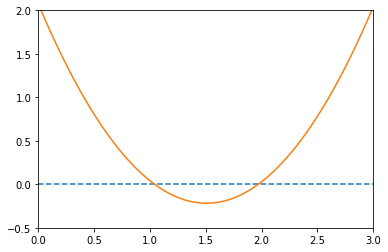

In [133]:
x = np.linspace(0,3,num = 1000,dtype=float)

ax = plt.gca()
ax.set_xlim(0,3)
ax.set_ylim(-.5,2)

z = 0*x
plt.plot(x,z, linestyle='dashed')

y = func(x)
plt.plot(x,y)


In [134]:
def bisection(f, x_min_start, x_max_start, tol):
    
    x_min = x_min_start
    x_max = x_max_start
    x_mid = 0.0 #midpoint
    
   # y_min = f(x_min)
    #y_max = f(x_max)
    #y_mid = 0.0
    
    imax = 1000
    i = 0 #iterator
    
    #flag = bisection_root_finding(f, x_min_start, x_max_start, tol)
    flag = check_guess(f, x_min_start, x_max_start, tol)
    if (flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):
        return x_max
    
    flag = 1
    
    while(flag):
        x_mid = 0.5*(x_min + x_max)
        y_mid = f(x_mid)
        
        if(np.fabs(y_mid)<tol):
            flag=0
        else:
            #x_mid is not the root            
            if(f(x_min)*f(x_mid)>0):
                #replace x_min with x_mid 
                x_min = x_mid
            else:
                x_max = x_mid
            
                
        #print(x_min, f(x_min), x_max, f(x_max))
        
    
        
        #count the iteration
        i += 1
        
        if(i>=imax):
            print("Exceeded max number of iterations = ", i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iteration after ', i)
            
    
    s = f"Total iterations until root found: {i}"
    print(s)
            
    return x_mid
            
    
    
    

In [135]:
x_min = .5
x_max = 1.5
tolerance = 1.0e-6

#print the initial guess
print(x_min, func(x_min))
print(x_max, func(x_max))

x_root = bisection(func, x_min, x_max, tolerance)
y_root = func(x_root)

s = "Root found with y(%f) = %f" % (x_root,y_root)

print(s)

x_min2 = 1.75
x_max2 = 2.25
tolerance = 1.0e-6

#print the initial guess
print(x_min2, func(x_min2))
print(x_max2, func(x_max2))

x_root2 = bisection(func, x_min2, x_max2, tolerance)
y_root = func(x_root2)

s = "Root found with y(%f) = %f" % (x_root2,y_root)
print(s)

s = f"Root 1: {x_root}
      Root 2: {x_root2}"
print(s)

0.5 0.8024999999999998
1.5 -0.2175000000000007
Total iterations until root found: 17
Root found with y(1.040871) = -0.000001
1.75 -0.15687500000000032
2.25 0.3431250000000001
Total iterations until root found: 16
Root found with y(1.969032) = -0.000001


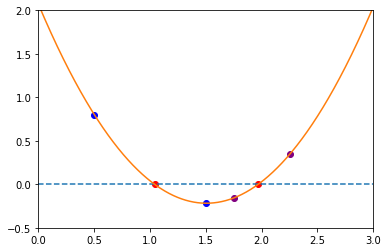

In [136]:
x = np.linspace(0,3,num = 1000,dtype=float)

ax = plt.gca()
ax.set_xlim(0,3)
ax.set_ylim(-.5,2)

z = 0*x
plt.plot(x,z, linestyle='dashed')

y = func(x)
plt.plot(x,y)


plt.scatter(x_min, func(x_min), color = 'blue')
plt.scatter(x_max, func(x_max), color = 'blue')

plt.scatter(x_min2, func(x_min2), color = 'purple')
plt.scatter(x_max2, func(x_max2), color = 'purple')

plt.scatter(x_root, func(x_root), color = 'red')
plt.scatter(x_root2, func(x_root2), color = 'red')